# Stress Test 
A notebook that generates data to feed the simscape simulation.     
The goal of the trajectory is to test the printer under sharp maneuvres, but also ensure its ability to work in various curves and straight lines. 

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os 
from delta import Delta 


## Bezier Curve functions

In [21]:
NCP = 6 
NNODES = 100 
def bezier_6(x_cp, y_cp): 
    
    # Calculate x and y coefficients of the x(t) and y(t) polynomials 
    x_coeffs = [] 
    y_coeffs = []
    t_points = np.linspace(0,1,NNODES)
    bezier_matrix =  [[1,-5,10,-10,5,-1],[0,5,-20,30,-20,5],[0,0,10,-30,30,-10],[0,0,0,10,-20,10],[0,0,0,0,5,-5],[0,0,0,0,0,1]]
    for i in range(NCP) : 
        sigma_x = 0 
        sigma_y = 0 

        for j in range(NCP): 
            sigma_x = sigma_x  + x_cp[j]*bezier_matrix[j][i]
            sigma_y = sigma_y  + y_cp[j]*bezier_matrix[j][i]
        
        x_coeffs.append(sigma_x)
        y_coeffs.append(sigma_y)

    # Genrate x and y points from the x(t) and y(t) polynomials
    x_points = np.zeros(NNODES)
    y_points = np.zeros(NNODES)
    
    for i in range(NNODES):
        for j in range(NCP): 
            y_points[i] = y_points[i] + y_coeffs[j]*t_points[i]**j
            x_points[i] = x_points[i] + x_coeffs[j]*t_points[i]**j
    
    return x_points,y_points

def rotate_curve(x_points,y_points,theta): 
    # theta in degrees 
    theta = np.deg2rad(theta)
    for i in range(len(x_points)): 
        x_orig = x_points[i]
        y_orig = y_points[i]
        x_points[i] = x_orig*np.cos(theta) -y_orig*np.sin(theta)
        y_points[i] = y_orig*np.cos(theta) + x_orig*np.sin(theta) 
    
    return x_points,y_points

## Stress trajectory generation -- sample 1
After using https://github.com/ducciomugnaini/Bezier-Curve-with-draggable-control-points to generate the control points, they are scaled and the curve is produced. 

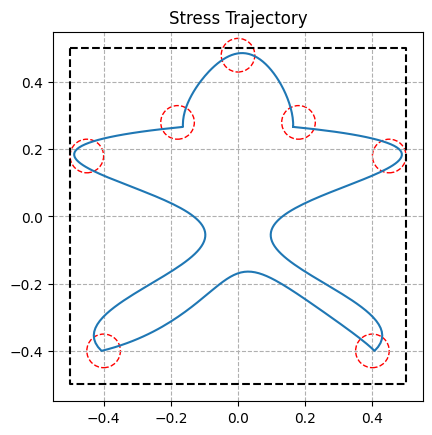

In [22]:
# Scale MTLAB-generated Control Points
x_cp = [1,1.2,1.5689,1.8303,2.2987,2.9993]
y_cp = [2,3.353,2.9048,-0.1,2.9582,2.4778]
x_cp = [i/max(x_cp) - 0.6 for i in x_cp]
y_cp = [i/max(y_cp) - 0.5 for i in y_cp]

x_points_top,y_points_top = bezier_6(x_cp,y_cp)

# Add right part closure section 
x_right_cp = [x_cp[-1],0.3,0.15,0,0.3,x_cp[-1]]
y_right_cp = [y_cp[-1],0.18, 0, 0, 0,-y_cp[-1]]
x_right_points , y_right_points = bezier_6(x_right_cp,y_right_cp)
x_points = np.append(x_points_top,x_right_points)
y_points = np.append(y_points_top,y_right_points)


# Add axisymmetric points 
x_points = np.append(x_points,np.flip(x_points_top))
y_points = np.append(y_points,np.flip(-y_points_top))


# Add left part closure section 
x_left_cp = [x_cp[0],-0.4,-0.6,-0.5,-0.4,x_cp[0]]
y_left_cp = [y_cp[0],0.1,0,0,-0.1,-y_cp[0]]
x_left_points , y_left_points = bezier_6(x_left_cp,y_left_cp)
x_points = np.append(x_points,np.flip(x_left_points))
y_points = np.append(y_points,np.flip(y_left_points))

# Rotate curve - angle in degrees 
x_points,y_points = rotate_curve(x_points,y_points,-90)
x_points = [i*1.7 for i in x_points]

# Plot points and 1mx1m bounding box 
fig, ax = plt.subplots()
plt.title("Stress Trajectory")
plt.plot([-0.5,0.5,0.5,-0.5,-0.5],[0.5,0.5,-0.5,-0.5,0.5], linestyle = '--', c = 'black')
# plt.scatter(x_points, y_points, s = 0.5) 
plt.plot(x_points,y_points)
plt.grid(linestyle = '--')

stress_region_1 = plt.Circle( (0.4,-0.4),0.05,fill = False, color = "r", linestyle = "--")
stress_region_2 = plt.Circle( (-0.18,+0.28),0.05,fill = False, color = "r", linestyle = "--")
stress_region_3 = plt.Circle( (-0.4,-0.4),0.05,fill = False, color = "r", linestyle = "--")
stress_region_4 = plt.Circle( (-0.45,0.18),0.05,fill = False, color = "r", linestyle = "--")
stress_region_5 = plt.Circle( (+0.45,0.18),0.05,fill = False, color = "r", linestyle = "--")
stress_region_6 = plt.Circle( (+0.18,+0.28),0.05,fill = False, color = "r", linestyle = "--")
stress_region_7 = plt.Circle( (+0.0,+0.48),0.05,fill = False, color = "r", linestyle = "--")

ax.set_aspect(1)
ax.add_artist(stress_region_1)
ax.add_artist(stress_region_2)
ax.add_artist(stress_region_3)
ax.add_artist(stress_region_4)
ax.add_artist(stress_region_5)
ax.add_artist(stress_region_6)
ax.add_artist(stress_region_7)
plt.show()

## Stress trajectory generation -- sample 2 
Generate a straight line spanning from the lower left to the upper right end of the print volume. 

In [ ]:
NPOINTS = 2000 
x_start = -0.5 
x_end = 0.5 
y_start = -0.5 
y_end = 0.5 

x_points = np.linspace(x_start,x_end,NPOINTS)
y_points = np.linspace(y_start,y_end,NPOINTS)

# Plot points and 1mx1m bounding box 
plt.title("Stress Trajectory")
plt.plot([-0.5,0.5,0.5,-0.5,-0.5],[0.5,0.5,-0.5,-0.5,0.5], linestyle = '--', c = 'black')
# plt.scatter(x_points, y_points, s = 0.5) 
plt.plot(x_points,y_points)
plt.grid(linestyle = '--')
plt.show()

## Actuator position calculation
Actuator positions for every point are obtaned from the soluion of the IKP. Since the distances between the points are not equal, we should export the positions with a variable time step in order to maintain constant print velocity. In the results file, data is saved as `Actuator 1 | Actuator 2 | Actuator 3 | Time`.   
Time is not directly generated from the IKP. The timestep will depend on the velocity of the printhead. If the velocity is constant, then the timestep will be constant. 

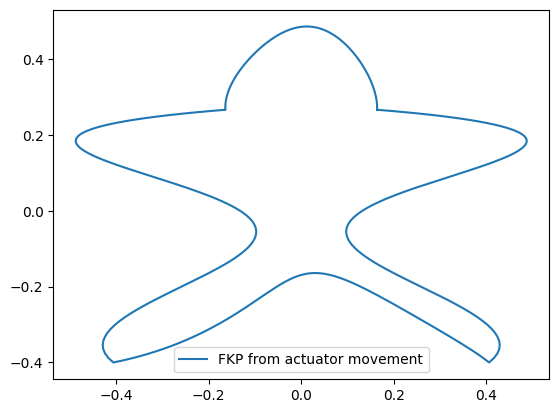

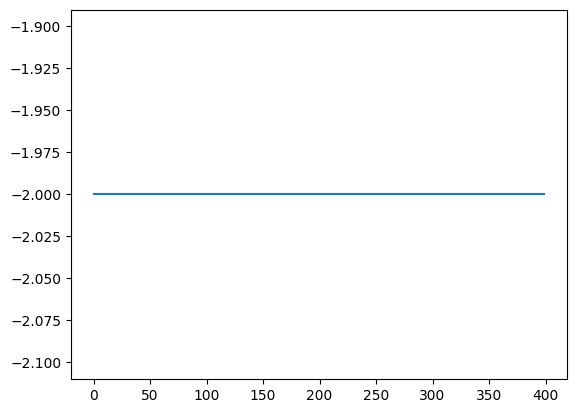

In [23]:
# Printer geometry data and vertical print level 
l = 1.49650 # arm length -- original design
l = 1.6 # arm length -- increased to reach all points
SB = 1.626695
sP = 0.147224
# WB = 0.816909
# wP = 0.045069
# uP = 0.084999
# UB = 0.900000

WB = np.sqrt(3)/6 * SB 
UB = np.sqrt(3)/3 * SB 
wP = np.sqrt(3)/6 * sP 
uP = np.sqrt(3)/3 * sP 

rail_height = 2.710 
bed_radius = 1.430/2 
printhead_radius = 0.085 

z = -2

# Actuator position timeseries export 
NPOINTS = len(x_points) # Greater than NNODES, since other points were added
printer = Delta(l,SB,sP,WB,wP,uP,UB,rail_height,bed_radius,printhead_radius)
u_print = 0.2 # print velocity in [TBD] from the project requirement sheet
time = np.zeros(NPOINTS)
plot_times = []
actuator_positions = np.zeros(shape = (NPOINTS,4)) # 3 actuators and time 
fkp_points = np.zeros(shape = (NPOINTS,3)) # x,y,z of the points 

# First point for time = 0 
time = 0 
res = printer.ikp_pos(x_points[0],y_points[0],z)
res.append(time)
plot_times.append(time)
actuator_positions[0] = res 

# res = printer.fkp_pos(actuator_positions[0,0],actuator_positions[0,1],actuator_positions[0,2],0,0,-actuator_positions[0,2]-l) 
res = printer.fkp_pos_alt(actuator_positions[0,0],actuator_positions[0,1],actuator_positions[0,2])
fkp_points[0] = res

# All other points
for i in range(1,NPOINTS): 
    # time at each point is the total previous time plus the time from the previous point to the current point
    p2p_dist = np.sqrt((x_points[i] - x_points[i-1])**2 + (y_points[i]-y_points[i-1])**2)
    time = time + p2p_dist/u_print

    # add time and actuator positions to results matrix
    res = printer.ikp_pos(x_points[i],y_points[i],z)
    res.append(time)
    plot_times.append(time)
    actuator_positions[i] = res

    # res = printer.fkp_pos(actuator_positions[i,0],actuator_positions[i,1],actuator_positions[i,2],0,0,-actuator_positions[i,2]-l) 
    res = printer.fkp_pos_alt(actuator_positions[i,0],actuator_positions[i,1],actuator_positions[i,2])
    fkp_points[i] = res 

# plot FKP vs original
plt.plot(fkp_points[:,0], fkp_points[:,1])
# plt.plot(x_points,y_points)
plt.legend(["FKP from actuator movement","Original"])
plt.show()

# plot z axis movements to confirm that they are zero 
plt.plot(range(len(fkp_points[:,0])),fkp_points[:,2])
plt.show()

np.savetxt("results/actuator_positions.csv",actuator_positions,delimiter=',',fmt ="%.5lf")

# # Plot actuator positions
# fig, ax = plt.subplots()
# l1, = ax.plot(actuator_positions[:,3],actuator_positions[:,0], label = "Actuator 1")
# l2, = ax.plot(actuator_positions[:,3],actuator_positions[:,1], label = "Actuator 2")
# l3, = ax.plot(actuator_positions[:,3],actuator_positions[:,2], label = "Actuator 3")
# handles = [l1,l2,l3]
# ax.legend(handles = handles)
# ax.grid(linestyle = '--')
# plt.show()



## Actuator velocities 
In order to dimension the drivetrain motors, we have to kwow the maximum velocity that needs to be applied to the actuators in order for the required print velocity to be achieved. The maximum vertical velocity required is less than the maximum velocity on the print plane, so we only use tha latter for this stress test

Text(0.5, 1.0, 'Actuator velocities for the stress trajectory')

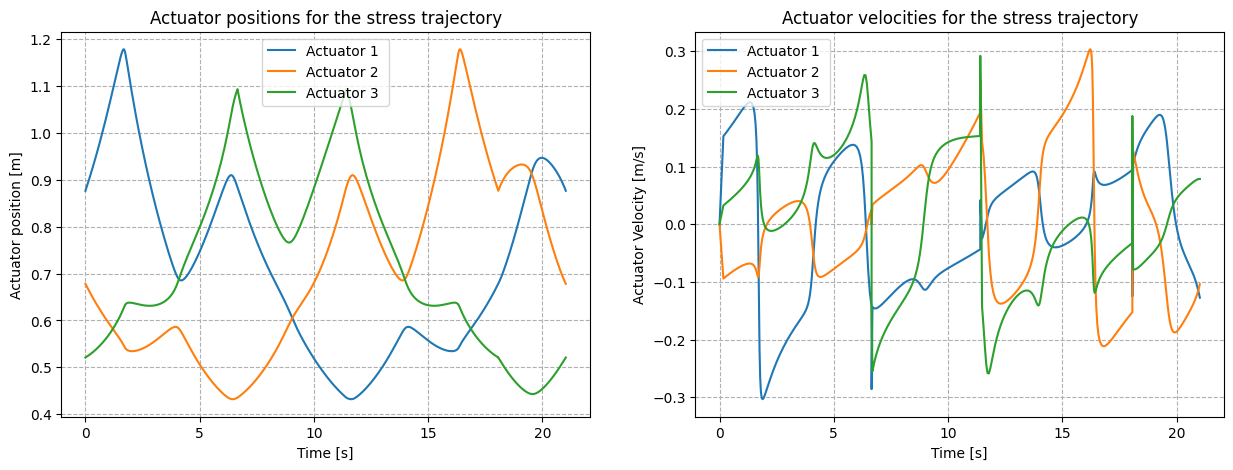

In [24]:
actuator_velocities = np.zeros(shape = (NPOINTS,4))
dt = np.zeros(NPOINTS)

# First point for time = 0 

actuator_velocities[0] = [0,0,0,plot_times[0]] 
dt[0] = 0 
for i in range(1,NPOINTS): 
    dt[i] = actuator_positions[i][3] - actuator_positions[i-1][3]
    actuator_velocities[i,0] = (actuator_positions[i,0] - actuator_positions[i-1,0]) / dt[i]
    actuator_velocities[i,1] = (actuator_positions[i,1] - actuator_positions[i-1,1]) / dt[i]
    actuator_velocities[i,2] = (actuator_positions[i,2] - actuator_positions[i-1,2]) / dt[i]
    actuator_velocities[i,3] = plot_times[i]

np.savetxt("results/actuator_velocities.csv",actuator_velocities,delimiter=',',fmt ="%.5lf")

fig,(ax1,ax) = plt.subplots(1,2, figsize = [15,5])

l1, = ax1.plot(plot_times,actuator_positions[:,0], label = "Actuator 1 ")
l2, = ax1.plot(plot_times,actuator_positions[:,1], label = "Actuator 2 ")
l3, = ax1.plot(plot_times,actuator_positions[:,2], label = "Actuator 3 ")
ax1.grid(linestyle = '--')
ax1.legend(handles = [l1,l2,l3], loc= 'upper center')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Actuator position [m]")
ax1.set_title("Actuator positions for the stress trajectory")

l1, = ax.plot(plot_times,actuator_velocities[:,0], label = "Actuator 1 ")
l2, = ax.plot(plot_times,actuator_velocities[:,1], label = "Actuator 2 ")
l3, = ax.plot(plot_times,actuator_velocities[:,2], label = "Actuator 3 ")
ax.grid(linestyle = '--')
ax.legend(handles = [l1,l2,l3], loc= 'upper left')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Actuator Velocity [m/s]")
ax.set_title("Actuator velocities for the stress trajectory")


## Simulation Benchmark
A trajectory with easily calculable forces on the actuators in order to validate the simscape simulation. 

In [ ]:
NPOINTS = 100 
benchmark_positions = np.zeros(shape = (NPOINTS,4)) 
benchmark_x = np.zeros(NPOINTS)
benchmark_y = np.zeros(NPOINTS)
benchmark_z = np.linspace(-2,-1.5,NPOINTS)

plot_times = []

acceleration = 3 # in [m/s^2]

# First point for time = 0 
time = 0 
res = printer.ikp_pos(benchmark_x[0],benchmark_y[0],benchmark_z[0])
res.append(time)
benchmark_positions[0] = res 
plot_times.append(time)

for i in range(1,NPOINTS): 
    res = printer.ikp_pos(benchmark_x[i],benchmark_y[i],benchmark_z[i])
    
    # Time shall be such that acceleration is kept constant, so the force is easily calculable
    dz = benchmark_z[i] - benchmark_z[0]
    time = np.sqrt(2*dz/acceleration)
    res.append(time)
    benchmark_positions[i] = res
    plot_times.append(time)

np.savetxt("results/benchmark_positions.csv",benchmark_positions,delimiter=',',fmt ="%.5lf")

plt.plot(plot_times, benchmark_positions[:,0])
plt.plot(plot_times, benchmark_positions[:,1])
plt.plot(plot_times, benchmark_positions[:,2])
plt.show()

## Animations 
Animate the trajectory, the actuator velocities and anything else that will add value to the project's presentation.

400


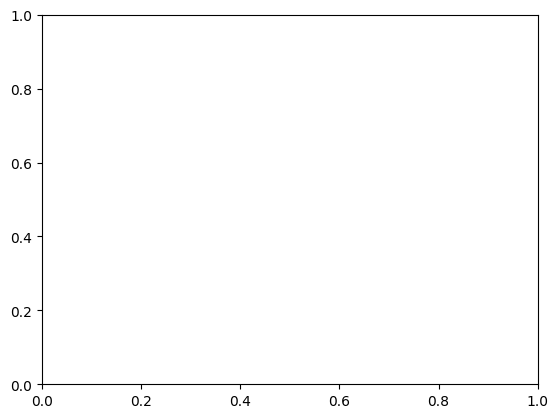

In [31]:
from matplotlib import animation 

t = plot_times
print(NPOINTS)

def animate_trajectory(num):
    ax.clear()
    ax.plot(x_points[:num+1], y_points[:num+1]) # update point location
    ax.set_xlim([-0.5,0.5])
    ax.set_ylim([-0.5,0.5])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(linestyle = "--")
    ax.set_title('Trajectory \nTime = ' + str(np.round(t[num],decimals=2)) + ' sec')

def animate_velocities(num):
    ax.clear()

    l1, = ax.plot(plot_times[:num+1],actuator_velocities[:num+1,0], label = "Actuator 1 ")
    l2, = ax.plot(plot_times[:num+1],actuator_velocities[:num+1,1], label = "Actuator 2 ")
    l3, = ax.plot(plot_times[:num+1],actuator_velocities[:num+1,2], label = "Actuator 3 ")

    ax.set_xlim([0,21])
    ax.set_ylim([-0.31,0.31])
    ax.set_xlabel("Time [sec]")
    ax.set_ylabel("Velocity [m/s]")
    ax.grid(linestyle = "--")
    ax.set_title('Actuator Velocities \nTime = ' + str(np.round(t[num],decimals=2)) + ' sec')
    ax.legend(handles = [l1,l2,l3], loc= 'upper left')
    


fig = plt.figure()
ax = plt.axes()
# line_ani = animation.FuncAnimation(fig,animate_trajectory, interval = 1e-6, frames = NPOINTS)
# plt.show()
# f = "../visualizations/trajectory.gif"
# writergif = animation.PillowWriter(fps=NPOINTS/21)
# line_ani.save(f, writer=writergif)

line_ani = animation.FuncAnimation(fig,animate_velocities, interval = 1e-6, frames = NPOINTS)
plt.show()
f = "../visualizations/velocities.gif"
writergif = animation.PillowWriter(fps=NPOINTS/21)
line_ani.save(f, writer=writergif)
